In [152]:
using Plots
using CSV
using DataFrames
using Glob
using JLD2
using ProgressMeter
using Printf

using GalaxySim

In [185]:
particles = []

for file in glob("data/*.dat")
    df = CSV.read(file, DataFrame)[1:1:end, :]
    push!(particles, df)
end

In [186]:
N = length(particles)
Nt = size(particles[1])[1]


function get_col(col)
    arr = zeros(N, Nt)
    
    for n in 1:N
        for i in 1:Nt
            arr[n, i] = particles[n][i, col]
        end
    end
    return arr
end


get_col (generic function with 1 method)

In [187]:
v1s = get_col("v1")

400×157 Matrix{Float64}:
  0.143242    0.143858    0.144476   …   0.225664    0.226049    0.226432
  0.32344     0.32285     0.322257       0.257011    0.256618    0.25622
 -0.319154   -0.319778   -0.320402      -0.395007   -0.395077   -0.395172
  0.451218    0.45103     0.450841       0.419919    0.419688    0.419457
  0.077377    0.0773517   0.0773248      0.0679501   0.0678662   0.0677823
  0.234875    0.235138    0.235404   …   0.268568    0.268758    0.268947
  0.409893    0.40961     0.409336       0.29101     0.289891    0.288777
 -0.482885   -0.482653   -0.482418      -0.43575    -0.435433   -0.435116
 -0.146097   -0.146124   -0.146151      -0.143581   -0.143383   -0.143182
  0.46301     0.463227    0.463447       0.493803    0.493896    0.493988
  0.174908    0.174639    0.17437    …   0.134957    0.134696    0.134434
  0.213656    0.213517    0.213377       0.190559    0.1904      0.190241
  0.2235      0.224008    0.224523       0.280068    0.280008    0.279949
  ⋮          

In [188]:
x1s = get_col("x1")
x2s = get_col("x2");
ρs = get_col("ρ")
Ts = get_col("T")
ts = get_col("t")

400×157 Matrix{Float64}:
 3.15e13  5.0715e15  1.01115e16  …  7.76192e17  7.81232e17  7.86272e17
 3.15e13  5.0715e15  1.01115e16     7.76192e17  7.81232e17  7.86272e17
 3.15e13  5.0715e15  1.01115e16     7.5263e17   7.5767e17   7.6271e17
 3.15e13  5.0715e15  1.01115e16     7.76192e17  7.81232e17  7.86272e17
 3.15e13  5.0715e15  1.01115e16     7.76192e17  7.81232e17  7.86272e17
 3.15e13  5.0715e15  1.01115e16  …  7.76192e17  7.81232e17  7.86272e17
 3.15e13  5.0715e15  1.01115e16     6.28205e17  6.33245e17  6.38285e17
 3.15e13  5.0715e15  1.01115e16     7.76192e17  7.81232e17  7.86272e17
 3.15e13  5.0715e15  1.01115e16     7.76192e17  7.81232e17  7.86272e17
 3.15e13  5.0715e15  1.01115e16     7.76192e17  7.81232e17  7.86272e17
 3.15e13  5.0715e15  1.01115e16  …  7.76192e17  7.81232e17  7.86272e17
 3.15e13  5.0715e15  1.01115e16     7.76192e17  7.81232e17  7.86272e17
 3.15e13  5.0715e15  1.01115e16     7.32092e17  7.36124e17  7.40156e17
 ⋮                               ⋱              ⋮    

In [189]:
ρs

400×157 Matrix{Float64}:
 0.611033    0.603753    0.596463    …  0.23361     0.232769    0.231931
 0.57328     0.5656      0.557225       0.055276    0.0535827   0.0519208
 0.052218    0.0514947   0.0507867      0.945247    0.862783    0.786612
 0.0611833   0.0594451   0.0576655      0.00984041  0.0100021   0.0101673
 0.0439298   0.0434777   0.0430118      0.0381101   0.0380131   0.0379148
 0.0419562   0.0436101   0.0454269   …  0.00529842  0.0053229   0.00534634
 0.828456    0.807182    0.786187       0.237383    0.248207    0.259601
 0.0577572   0.0582455   0.0588443      0.0488388   0.0484034   0.0479724
 0.0176545   0.0174452   0.0171955      0.106448    0.108394    0.110295
 0.0342275   0.035555    0.0370118      0.0147721   0.0142528   0.0137572
 0.0083164   0.00807101  0.00781176  …  0.00723164  0.0072941   0.00735692
 0.00379776  0.00380463  0.00381124     0.008901    0.00913352  0.00937317
 0.828456    0.807182    0.786187       2.40246     2.41339     2.42158
 ⋮              

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
[ Info: Saved animation to /home/daniel/.julia/dev/GalaxySim/tmp.gif


Plots.AnimatedGif("/home/daniel/.julia/dev/GalaxySim/tmp.gif")
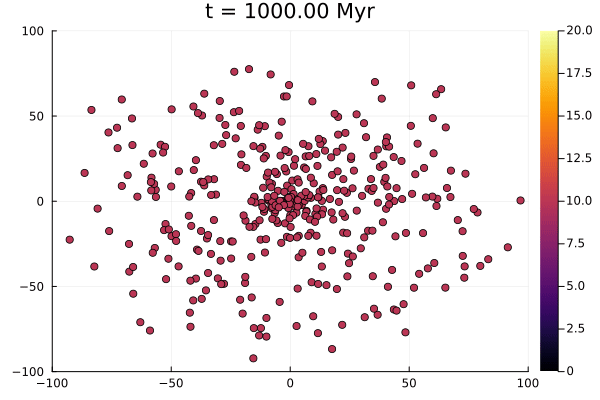

In [190]:
prog = Progress(Nt)

Rv = 100

function plot_gal(x, y, c, s, t)    
    scatter(x, y, marker_z=c, clim=(0, 20), xlim=[-Rv, Rv], ylim=[-Rv, Rv], legend=false, colorbar=true)
    title!(@sprintf("t = %2.2f Myr", t/1e3yr))  
end


@gif for i ∈ 1:1:Nt
    filt = x1s[:, i] .< Rv
    plot_gal(x1s[filt, i], x2s[filt, i], Ts[filt, i], Rv, ts[i])
    next!(prog)
end

In [194]:
plot(transpose(ts))